<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Machine_Learning/blob/main/ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Practical No. 04 </h1>
<h5>House Price Prediction using Regression</h5>

In [131]:
# Import visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [111]:
file_path = '/content/drive/MyDrive/6TH SEM/Machine Learning Lab/housing_data.csv'
data = pd.read_csv(file_path)
data.head()


,area,bedrooms,age,price
0,2860,1,11,630703
1,3294,2,4,733871
2,3130,3,34,681307
3,3095,2,38,667133
4,3638,3,46,785805


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      1000 non-null   int64
 1   bedrooms  1000 non-null   int64
 2   age       1000 non-null   int64
 3   price     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [113]:
#format age column
newData = data[data['age'] >= 18]
newData.head()

,area,bedrooms,age,price
2,3130,3,34,681307
3,3095,2,38,667133
4,3638,3,46,785805
6,2466,4,38,556791
7,3238,5,19,743249


In [114]:
newData.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,656.000000,656.000000,656.000000,656.000000
mean,3510.641768,2.961890,32.966463,765644.033537
std,857.340901,1.424994,9.397357,173004.582803
min,2001.000000,1.000000,18.000000,444159.000000
25%,2793.000000,2.000000,24.000000,620842.750000
50%,3492.500000,3.000000,33.000000,760109.500000
75%,4214.750000,4.000000,41.000000,907714.000000
max,4999.000000,5.000000,49.000000,1081021.000000


In [115]:
#Missing value in any attribute
newData.isnull().sum()


,0
area,0
bedrooms,0
age,0
price,0


In [116]:
# Split data into training (70%) and testing (30%)
X = newData[['area', 'bedrooms', 'age']]
y = newData['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)


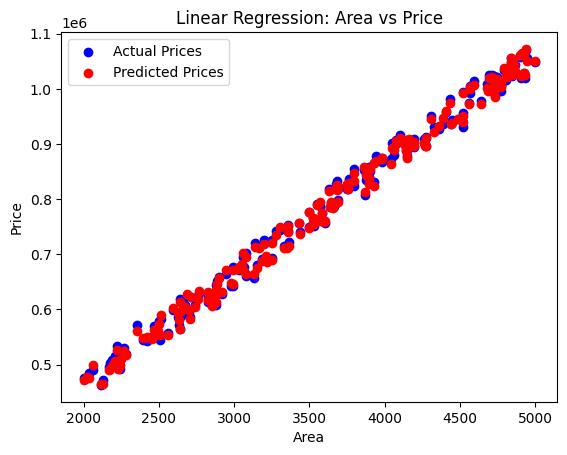

In [125]:
# Plot regression line for area vs price
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['area'], predictions, color='red', label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [120]:
# Display results
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")

Model Coefficients: [  200.18513845 10232.11159774  -487.76797552]
Model Intercept: 48397.12586829206
Mean Squared Error: 31766864.34065571


In [121]:
#Equation of Estimation
print(f"Equation of Estimation: Price = {model.intercept_} + {model.coef_[0]} * Area + {model.coef_[1]} * Bedrooms + {model.coef_[2]} * Age")


Equation of Estimation: Price = 48397.12586829206 + 200.1851384504497 * Area + 10232.111597739511 * Bedrooms + -487.76797552312746 * Age


In [122]:
#Accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9989614792784176


<h1> Bonus Assignment </h1>
<h6> KNN Regression </h6>


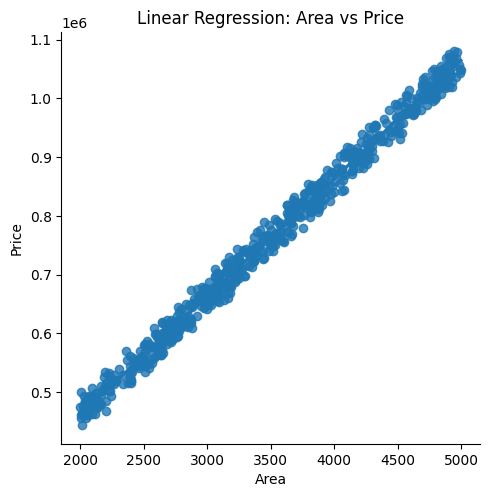

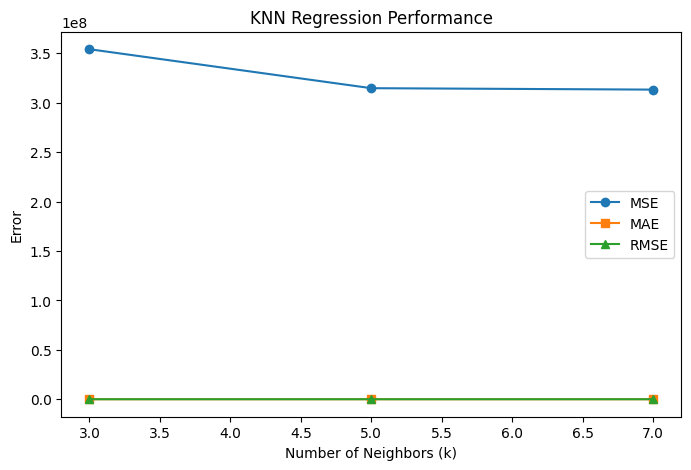

Linear Regression -> MSE: 31766864.34065571, MAE: 4839.959790107152, RMSE: 5636.210104374722
KNN (k=3) -> MSE: 354117684.8138748, MAE: 15773.940778341792, RMSE: 18818.014900989816
KNN (k=5) -> MSE: 314692425.45380723, MAE: 14617.285279187818, RMSE: 17739.57230188505
KNN (k=7) -> MSE: 313254358.25111365, MAE: 14428.232052211746, RMSE: 17698.993142298055


In [135]:
# Split data into training (70%) and testing (30%)
X = newData[['area', 'bedrooms', 'age']]
y = newData['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate Linear Regression model
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

# Train and evaluate KNN models with different k values
k_values = [3, 5, 7]
knn_mse = []
knn_mae = []
knn_rmse = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_mse.append(mean_squared_error(y_test, knn_predictions))
    knn_mae.append(mean_absolute_error(y_test, knn_predictions))
    knn_rmse.append(np.sqrt(knn_mse[-1]))

# Plot regression line using seaborn lmplot
sns.lmplot(x='area', y='price', data=newData)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.show()

# Plot k vs model performance
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_mse, marker='o', label='MSE')
plt.plot(k_values, knn_mae, marker='s', label='MAE')
plt.plot(k_values, knn_rmse, marker='^', label='RMSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('KNN Regression Performance')
plt.legend()
plt.show()

# Display results
print(f"Linear Regression -> MSE: {lr_mse}, MAE: {lr_mae}, RMSE: {lr_rmse}")
for i, k in enumerate(k_values):
    print(f"KNN (k={k}) -> MSE: {knn_mse[i]}, MAE: {knn_mae[i]}, RMSE: {knn_rmse[i]}")
